# RBDS CNPq Universal

Reginaldo K Fukuchi, Jan 2023, reginaldo.fukuchi@ufabc.edu.br

This supplemental material presents a script that exemplifies the basic data analysis steps taken to calculate the discrete variables presented in the companion manuscript.

Fukuchi RK, Fukuchi CA and Duarte M (2017). A public data set of running biomechanics and the effects of running speed on lower extremity kinematics and kinetics. PeerJ Preprints.

In addition, it demonstrates plots of angles, moments, powers and ground reaction force curves displayed in the manuscript.

Some of the steps have been reduced to minimize clutter, but the user should be able to adapt this code to any given file structure.

In [1]:
# Prepare environment
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# Import data
pathname = r'../data'
fname    = os.path.join(pathname, 'RBDS001processed.txt') 
# Import data
data_p = pd.read_csv(fname, sep = '\t')

Display the first and last rows of the data set

In [3]:
data_p.head()

,PercGcycle,RhipAngX25,RhipAngY25,RhipAngZ25,RkneeAngX25,RkneeAngY25,RkneeAngZ25,RankleAngX25,RankleAngY25,RankleAngZ25,...,LkneeMomZ45,LankleMomX45,LankleMomY45,LankleMomZ45,LgrfX45,LgrfY45,LgrfZ45,LhipPow45,LkneePow45,LanklePow45
0,0,0.832421,-1.452330,34.9272,0.489699,-7.14188,13.3967,9.39102,9.95580,-8.48566,...,-0.903513,0.045675,0.004664,0.127170,-0.281726,0.747135,0.206165,3.349560,2.297550,0.141932
1,1,1.027420,-0.984369,34.7158,0.748503,-7.19969,14.8239,9.09130,9.63101,-8.25727,...,-0.771055,0.037458,-0.021066,0.112274,-0.624050,1.980950,0.355853,2.368190,3.438310,0.022916
2,2,1.297540,-0.453284,34.5310,1.033280,-7.07545,16.7462,8.32232,9.06687,-7.44700,...,-0.585683,0.022878,-0.051072,0.109896,-1.078790,3.780740,0.511992,1.381370,3.546450,-0.255764
3,3,1.651410,0.058217,34.3569,1.298770,-6.67115,19.1002,7.07360,8.22768,-5.88477,...,-0.339911,0.001833,-0.085684,0.144646,-1.608350,6.101660,0.624400,0.521442,2.453480,-0.825283
4,4,2.091700,0.452856,34.1743,1.474230,-5.98035,21.7637,5.45933,7.17670,-3.58610,...,-0.033705,-0.030734,-0.129926,0.238037,-2.146880,8.766550,0.623558,-0.066363,0.213324,-1.919960


In [4]:
data_p.tail()

,PercGcycle,RhipAngX25,RhipAngY25,RhipAngZ25,RkneeAngX25,RkneeAngY25,RkneeAngZ25,RankleAngX25,RankleAngY25,RankleAngZ25,...,LkneeMomZ45,LankleMomX45,LankleMomY45,LankleMomZ45,LgrfX45,LgrfY45,LgrfZ45,LhipPow45,LkneePow45,LanklePow45
96,96,0.545409,-1.71169,36.3611,0.187782,-7.33327,13.1358,8.09858,9.72307,-7.00467,...,-0.994201,0.027694,0.016458,0.070850,NaN,NaN,NaN,5.73498,-6.04350,0.078712
97,97,0.577337,-1.96685,35.8743,0.104145,-7.03163,12.3355,8.60541,10.01980,-7.50802,...,-0.995931,0.030502,0.015447,0.074687,NaN,NaN,NaN,5.33368,-3.57712,0.079007
98,98,0.624613,-1.98444,35.4794,0.143556,-6.94577,12.1139,9.02352,10.14670,-7.94785,...,-0.977875,0.031532,0.013622,0.073681,NaN,NaN,NaN,4.78773,-1.13775,0.080928
99,99,0.705339,-1.80077,35.1640,0.279452,-7.00298,12.4627,9.31145,10.12820,-8.28250,...,-0.938711,0.031050,0.010919,0.069880,NaN,NaN,NaN,4.09087,1.05264,0.082650
100,100,0.837003,-1.45620,34.9105,0.485669,-7.11293,13.3629,9.37194,9.97503,-8.41857,...,-0.903423,0.045608,0.004567,0.127016,NaN,NaN,NaN,3.17990,2.79426,0.119833


In [5]:
variables = data_p.columns.tolist()

In [6]:
# Parameters to create variable names
joints    = ['hip','knee','ankle']
axes      = ['X','Y','Z']
speed     = [25, 35, 45]
speed_leg = ['2.5 m/s','3.5 m/s','4.5 m/s']

## Hip, knee and ankle kinematics
Plot the time normalized angles to the the gait cycle (0-100%).

<IPython.core.display.Javascript object>


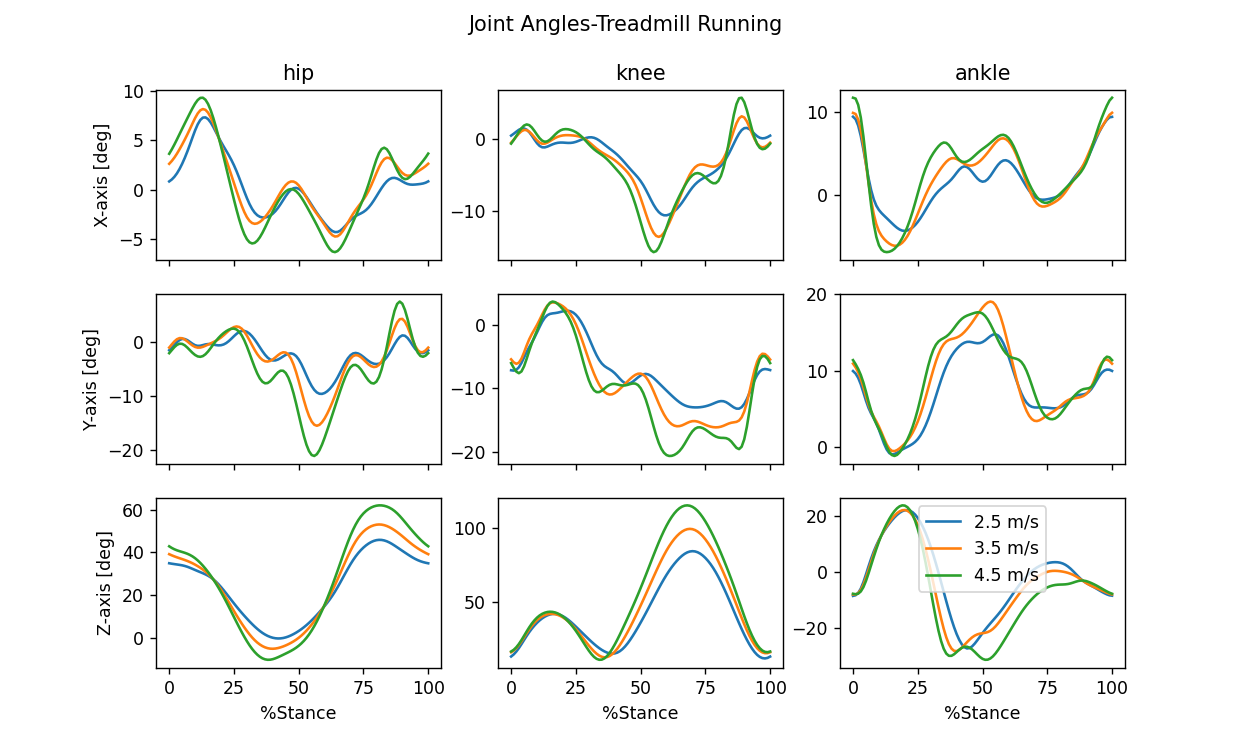

In [7]:
angs = np.empty(shape=(101,3))
fig, axs = plt.subplots(nrows=3,ncols=3, sharex=True, squeeze=True, figsize=(10, 6))
fig.suptitle('Joint Angles-Treadmill Running')
tn = data_p['PercGcycle']
for j, joint in enumerate(joints):
    for xyz, eixos in enumerate(axes):
        for s, vel in enumerate(speed):
            angs[:,s] = data_p['R'+joints[j]+'Ang'+axes[xyz]+str(speed[s])]

        axs[xyz,j].plot(tn, angs)
        if eixos=='X':
            axs[xyz,j].set_title(joint)
        if eixos=='Z':
            axs[xyz,j].set_xlabel('%Stance')
        if joint=='hip':
            axs[xyz,j].set_ylabel(eixos+'-axis [deg]')
plt.legend(speed_leg) 
plt.show()

## Hip, knee and ankle moments
Plot the time normalized joint moments to the the gait cycle (0-100%).

<IPython.core.display.Javascript object>


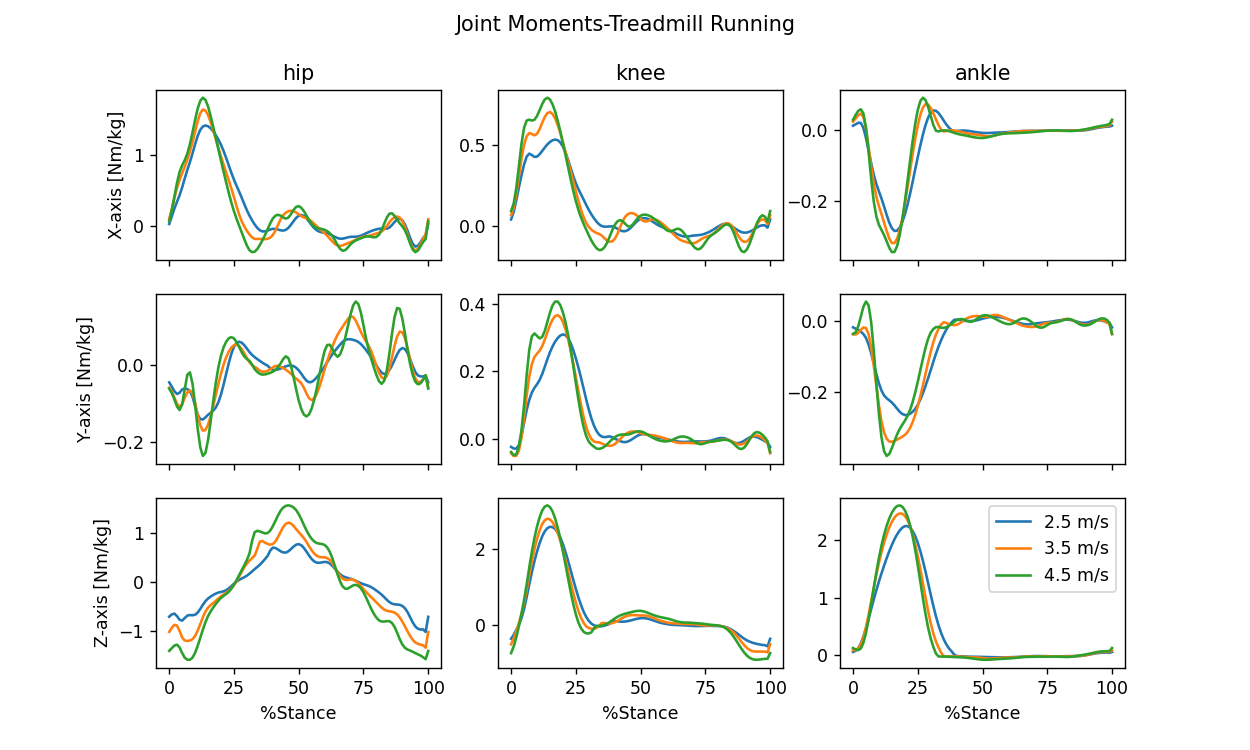

In [8]:
angs = np.empty(shape=(101,3))
fig, axs = plt.subplots(nrows=3,ncols=3, sharex=True, squeeze=True, figsize=(10, 6))
fig.suptitle('Joint Moments-Treadmill Running')
tn = data_p['PercGcycle']
for j, joint in enumerate(joints):
    for xyz, eixos in enumerate(axes):
        for s, vel in enumerate(speed):
            angs[:,s] = data_p['R'+joints[j]+'Mom'+axes[xyz]+str(speed[s])]

        axs[xyz,j].plot(tn, angs)
        if eixos=='X':
            axs[xyz,j].set_title(joint)
        if eixos=='Z':
            axs[xyz,j].set_xlabel('%Stance')
        if joint=='hip':
            axs[xyz,j].set_ylabel(eixos+'-axis [Nm/kg]')
plt.legend(speed_leg) 
plt.show()

## Hip, knee and ankle powers
Plot the time normalized joint powers to the the gait cycle (0-100%).

<IPython.core.display.Javascript object>


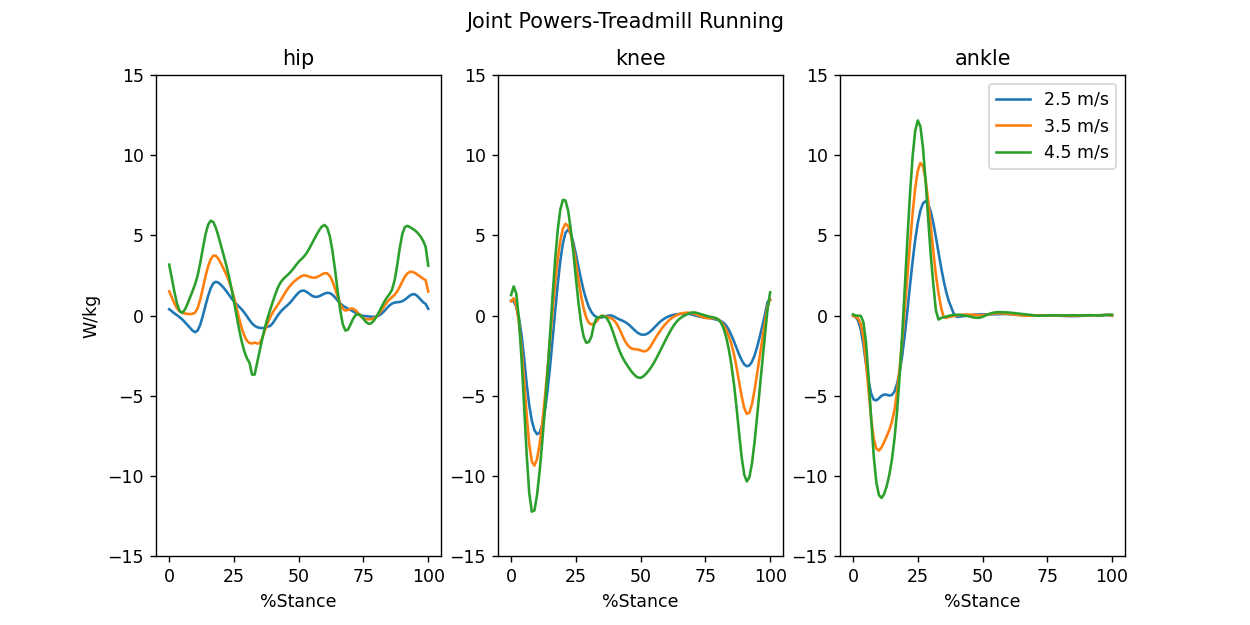

In [9]:
angs = np.empty(shape=(101,3))
fig, axs = plt.subplots(nrows=1,ncols=3, sharex=True, squeeze=True, figsize=(10, 5))
fig.suptitle('Joint Powers-Treadmill Running')
tn = data_p['PercGcycle']
for j, joint in enumerate(joints):
    for s, vel in enumerate(speed):
        angs[:,s] = data_p['R'+joints[j]+'Pow'+str(speed[s])]

    axs[j].plot(tn, angs)
    axs[j].set_title(joint)
    axs[j].set_xlabel('%Stance')
    if joint=='hip':
        axs[j].set_ylabel('W/kg')
    axs[j].set_ylim([-15,15])
plt.legend(speed_leg) 
plt.show()

## Ground reaction forces (GRF)
Plot the time normalized GRFs to the the gait cycle (0-100%).

<IPython.core.display.Javascript object>


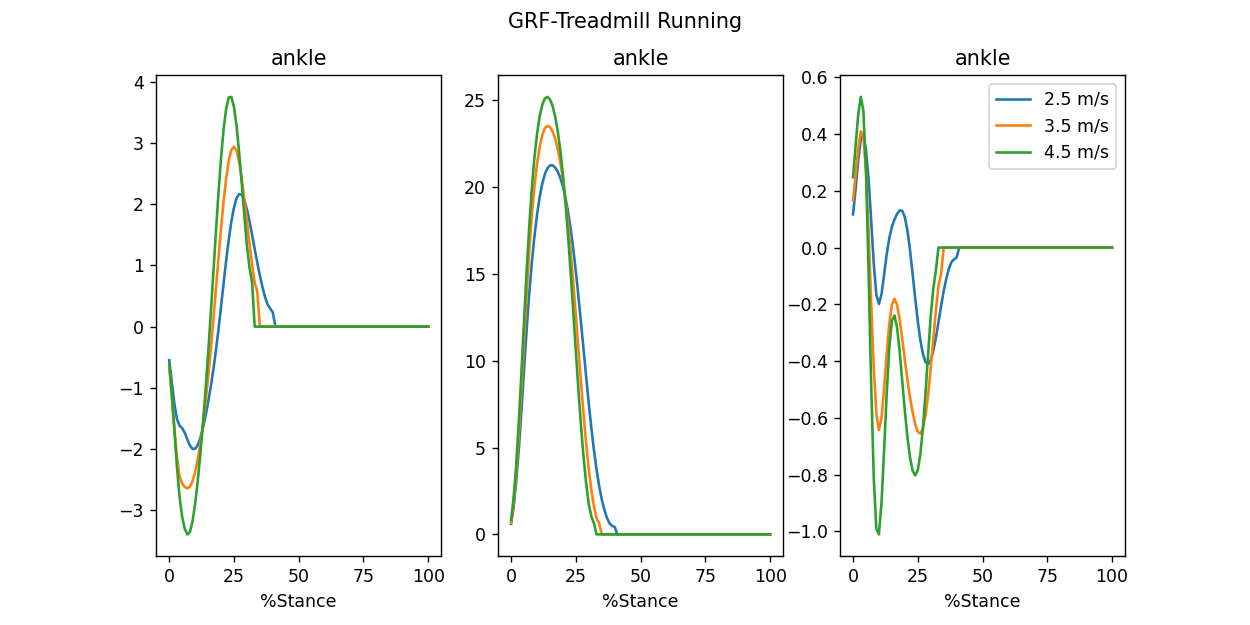

In [10]:
angs = np.empty(shape=(101,3))
fig, axs = plt.subplots(nrows=1,ncols=3, sharex=True, squeeze=True, figsize=(10, 5))
fig.suptitle('GRF-Treadmill Running')
tn = data_p['PercGcycle']
for xyz, eixo in enumerate(axes):
    for s, vel in enumerate(speed):
        angs[:,s] = data_p['Rgrf'+eixo+str(speed[s])].fillna(0)

    axs[xyz].plot(tn, angs)
    axs[xyz].set_title(joint)
    axs[xyz].set_xlabel('%Stance')
    if joint=='hip':
        axs[xyz].set_ylabel('W/kg')
plt.legend(speed_leg) 
plt.show()

## Display markers position
### Static trial

In [11]:
fname_s= os.path.join(pathname, 'RBDS001static.txt') 
# Import data
static = pd.read_csv(fname_s, sep = '\t', index_col='Time')

In [ ]:
static.head()

In [ ]:
static.tail()

In [ ]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

### Visualize static markers position

In [ ]:
sns.set_style("whitegrid")
staticm = static.mean().values

from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d',  facecolor='white')
ax.view_init(25, 50, vertical_axis='y')

ax.scatter(staticm[0:-3:3], staticm[1:-2:3], staticm[2:-1:3], c='r', s=30, depthshade=False)
ax.set_xlim3d([np.nanmin(staticm[0::3]), np.nanmax(staticm[0::3])])
ax.set_ylim3d([np.nanmin(staticm[1::3]), np.nanmax(staticm[1::3])])
ax.set_zlim3d([np.nanmin(staticm[2::3]), np.nanmax(staticm[2::3])])
ax.set_xlabel('\n' + 'X [m]', linespacing=2)
ax.set_ylabel('\n' + 'Y [m]', linespacing=2)
ax.set_zlabel('\n' + 'Z [m]', linespacing=2)
set_axes_equal(ax)
plt.show()

# Animation of running data

In [ ]:
fname_r= os.path.join(pathname, 'RBDS001runT35markers.txt') 
# Import data
run  = pd.read_csv(fname_r, sep = '\t', index_col='Time')

In [ ]:
run.head()

In [ ]:
run.tail()

In [ ]:
freq = 150

In [ ]:
dat = np.empty(shape=(int(run.shape[1]/3),run.shape[0],3))
for d in range(dat.shape[0]):
    for m in range(int(run.shape[1]/3)):
        dat[m,d,:] = run.values[d,3*m]

In [ ]:
data = dat

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

dat = data[:, :1500, :]
freq = 150

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.view_init(25, 50, vertical_axis='y')
pts = []
for i in range(dat.shape[0]):
    pts += ax.plot([], [], [], 'o')

ax.set_xlim3d([np.nanmin(dat[:, :, 0]), np.nanmax(dat[:, :, 0])])
ax.set_ylim3d([np.nanmin(dat[:, :, 1]), np.nanmax(dat[:, :, 1])])
ax.set_zlim3d([np.nanmin(dat[:, :, 2]), np.nanmax(dat[:, :, 2])])
ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')
ax.set_zlabel('Z [mm]')

# animation function
def animate(i):
    for pt, xi in zip(pts, dat):
        x, y, z = xi[:i].T
        pt.set_data(x[-1:], y[-1:])
        pt.set_3d_properties(z[-1:])   
    return pts

# Animation object
anim = animation.FuncAnimation(fig, func=animate, frames=dat.shape[1], interval=1500/freq, blit=True)

plt.show()

In [ ]:
"""
A simple example of an animated plot... In 3D!
"""
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

def Gen_RandLine(length, dims=2) :
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length) :
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index-1] + step

    return lineData

def update_lines(num, dataLines, lines) :
    for line, data in zip(lines, dataLines) :
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2,:num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                              interval=50, blit=False)

plt.show()

In [ ]:
xP = importdata([fileDir filesep 'RBDS001processed.txt']);

time = xP.data(:,1);  % time normalized vector

varName = 'RhipAngZ25'; % Hip Sagittal Angle at 2.5 m/s

% Find the column corresponding to the variable based on the file header
iVar = strcmp(varName,xP.colheaders(1,:));

xX = xP.data(:,iVar);

% Calculating global maximum and minimum values using max and min functions
[maxVal,imaxVal] = max(xX);
[minVal,iminVal] = min(xX);
%% Ground reaction forces (GRF) impulse calculation based on the area under
% the curves
grfName = 'RgrfX25'; % GRF in the A-P direction

% Find the column corresponding to the variable based on the file header
iGRF = strcmp(grfName,xP.colheaders);

xGRF = xP.data(:,iGRF);

% Finding values greater and lower than zero
iGRFgt0 = find(xGRF > 0);
iGRFlt0 = find(xGRF < 0);

% Calculating GRF Impulse from GRF curves using trapz function
impGRFpos = trapz(time(iGRFgt0)/length(time),xGRF(iGRFgt0));
impGRFneg = trapz(time(iGRFlt0)/length(time),xGRF(iGRFlt0));
%% Joint work calculation based on the area under the joint power curves
powName = 'RhipPow25'; % Hip joint power

% Find the column corresponding to the variable based on the file header
iPow = strcmp(powName,xP.colheaders);

xPow = xP.data(:,iPow);

% Finding values greater and lower than zero
iPowgt0 = find(xPow > 0);
iPowlt0 = find(xPow < 0);

% Calculating GRF Impulse from GRF curves using trapz function
posPower = trapz(time(iPowgt0)/length(time),xPow(iPowgt0));
negPower = trapz(time(iPowlt0)/length(time),xPow(iPowlt0));
%% Example of batching processing the data. This can be used to open the 
% processed files and generate plots of angles, moments, powers and GRFs.
nsubjs = 1; % Change this parameter according to the number of subjects to be processed.

%% Other parameters 
speed     = [2.5,3.5,4.5]; % running speeds in m/s
joints    = {'hip','knee','ankle'}; % lower extremity joints
axesXYZ   = {'X','Y','Z'}; % Reference system
side      = {'R','L'}; % Limb side
varType   = {'Ang','Mom','Pow','grf'}; % Biomechanical variable types

% Parameters for plotting data
show   = 1; % control for displaying graphs 
cor    = {'b','r'}; symbol = {'-','-.',':'};
ngs = length(speed); % number of different gait speeds

for is = 1:length(side)
    hcurve = [];
    for ivar = 1:length(varType)
        for ij = 1:length(joints)
            for igs = 1:length(speed)
                for xyz = 1:length(axesXYZ)
                    nrows = 3; ncols = 3;
                    
                    step = xyz; stride = ij;
                    
                    if ivar == 3 % Joint power header names
                        % scalar joint power only joints, no xyz
                        xyz = 1; axesXYZ = {''};
                        
                        % Subplot parameters
                        step = ij; stride = 1; nrows = 1; ncols = 3;
                        
                    elseif ivar == 4 % GRF header names
                        % GRF only xyz, no joints
                        ij = 1; joints = {''};
                        
                        % Subplot parameters
                        nrows = 1; ncols = 3; step = xyz; stride = 1;
                    end
                    
                    varName = strcat(side{is},joints{ij},varType{ivar},...
                        axesXYZ{xyz},num2str(speed(igs)*10));
                    
                    xXx = []; %create empty variable
                    
                    for isubj = 1:nsubjs
                        % Import files
                        subLabel = ['RBDS0' num2str(isubj,'%02i')]; % Subject label
                        xP = importdata([fileDir filesep subLabel 'processed.txt']);
                        
                        % Find the column corresponding to the variable based on the header
                        iVar = find(strcmp(varName,xP.colheaders));
                        
                        xX = xP.data(:,iVar);
                        
                        xXx = [xXx xX]; % Concatenate data of different subjects                          
                    end
                    
                    % Generate the average curves across subjects
                    if show
                        time = xP.data(:,1); % time normalized vector
                        nvars = length(varType); % Number of variable types
                        
                        figure((nvars*is-nvars)+ivar)
                        subplot(nrows,ncols,(3*stride-3)+step)
                        % Ploting average curve across subjects
                        hcurve = plot(time,mean(xXx,2),...
                            strcat(cor{is},symbol{igs}));
                        set(hcurve,'Linewidth',2)
                        hold on, xlim([0 100])
                        xlabel('Gait cycle [%]'), ylabel(varName)
                        
                        hleg(igs) = hcurve;
                    end
                    
                    % Update cell arrays
                    joints    = {'hip','knee','ankle'}; % lower extremity joints
                    axesXYZ   = {'X','Y','Z'}; % Reference system
                    
                end
                % Creating legend for the curves
                legText{igs} = strcat(num2str(speed(igs)),' m/s');                
                
            end            
        end
        % Legend of the graphs
        legend(hleg,legText)
    end
end

%% Load and visualize the marker position during standing calibration trial for subject 1
% Select the directory where the raw files are located
fileDir = uigetdir;

%% Import data
xS = importdata([fileDir filesep 'RBDS01static.txt']);

timeS = xS.data(:,1);

markerLabelS = xS.colheaders(2:end);
markerLabelS2 = markerLabelS(1:3:end-2);

dataS = xS.data(:,2:end);
%% 3D plot of static markers
figure
subplot(1,2,1)

for i = 1:size(dataS,2)/3
    % Showing standing calibration markers
    h1(i) = plot3(mean(dataS(:,3*i)),mean(dataS(:,3*i-2)),mean(dataS(:,3*i-1)),'bo'); hold on
    
    % Assigning label to markers
    text(mean(dataS(:,3*i)),mean(dataS(:,3*i-2)),mean(dataS(:,3*i-1)),[' ' num2str(i)])
    
    leg{i} = [num2str(i) '-' markerLabelS2{i}];
end

% Plotting Lab coordinate system
h2 = plot3([500 500+250],[500 500],[0 0],'b-');
h3 = plot3([500 500],[500 500+250],[0 0],'r-');
h4 = plot3([500 500],[500 500],[0 250],'g-');

set([h2 h3 h4],'Linewidth',2)

xlabel('Z-axis'), ylabel('X-axis'), zlabel('Y-axis')
% view([180 0]) % force figure to be displayed in this view.

axis equal
axis([450 1600 400 1250 0 1500])
grid

% Showing legend of markers
lg = legend(h1,leg);

set(lg,'Position',[0.6629 0.0906 0.1010 0.8261])
set(gca,'CameraPosition',[320.9143 9.7713e+03 5.9311e+03])

%% Import markers during running at 2.5 m/s for subject 1
xD = importdata([fileDir filesep 'RBDS01runT35markers.txt']);

timeD = xD.data(:,1); % time vector

markerLabelD = xD.colheaders(2:end);
markerLabelD2 = markerLabelD(1:3:end-2);

dataD = xD.data(:,2:end);
%% Import forces during running at 2.5 m/s for subject 1
xF = importdata([fileDir filesep 'RBDS01runT35forces.txt']);

timeF = xF.data(:,1);

dataF = xF.data(:,2:end);
%% Making animation
markers = dataD;
CoPz = dataF(1:2:end,6);
CoPx = dataF(1:2:end,4);
Fz   = dataF(1:2:end,3);
Fy   = dataF(1:2:end,2);
Fx   = dataF(1:2:end,1);

% Treadmill dimensions
widthT  = 486;
lengthT = 1800;

% Position of the geometric center of the treadmill in the lab
centerTposition = [2149 0 976.7];

corner1 = [centerTposition(1)-lengthT/2 0 centerTposition(3)-widthT/2];
corner2 = [corner1(1) corner1(2) corner1(3)+widthT];
corner3 = [corner1(1)+lengthT corner1(2) corner2(3)];
corner4 = [corner3(1) corner3(2) corner1(3)];

n2cm = .75; % Newtons to cm
figure
for i = 1:10:size(markers,1)
    
    % Plotting markers
    plot3(markers(i,3:3:end),markers(i,1:3:end-2),markers(i,2:3:end-1),'o'), hold on
    
    % Plotting force platform borders
    plot3([corner1(3) corner2(3) corner3(3) corner4(3) corner1(3)],...
        [corner1(1) corner2(1) corner3(1) corner4(1) corner1(1)],...
        [corner1(2) corner2(2) corner3(2) corner4(2) corner1(2)],...
        'ko-')
    
    
    % Force plate area
    hFP = fill3([corner1(3) corner2(3) corner3(3) corner4(3)],...
        [corner1(1) corner2(1) corner3(1) corner4(1)],...
        [corner1(2) corner2(2) corner3(2) corner4(2)],...
        [0 0 0]);
    
    hFP.FaceAlpha = 0.5; % Setting transparent filling
    
    % Plotting GRF vector
    hArrow = plot3([CoPz(i) CoPz(i)+Fz(i)/n2cm],[CoPx(i) CoPx(i)+Fx(i)/n2cm],[0 Fy(i)/n2cm],'k-');
    
    hArrow.LineWidth = 2;
    
    grid on
    axis equal, axis([750 1300 1500 3200 0 1500])
    
    hold off
    pause(0.1)
end